In [1]:
import pandas as pd
import os 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
os.chdir(r"C:\Users\ceren\Desktop\netflix")

In [3]:
os.getcwd()
df=pd.read_csv('netflix.csv')
df.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       584 non-null    object 
 1   Genre       584 non-null    object 
 2   Premiere    584 non-null    object 
 3   Runtime     584 non-null    int64  
 4   IMDB Score  584 non-null    float64
 5   Language    584 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 27.5+ KB


In [5]:
df["Premiere"]= pd.to_datetime(df['Premiere'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Title       584 non-null    object        
 1   Genre       584 non-null    object        
 2   Premiere    584 non-null    datetime64[ns]
 3   Runtime     584 non-null    int64         
 4   IMDB Score  584 non-null    float64       
 5   Language    584 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 27.5+ KB


# Sorular

### 1.Veri setine göre uzun soluklu filmler hangi dilde oluşturulmuştur? Görselleştirme yapınız.

<AxesSubplot:xlabel='count', ylabel='Language'>

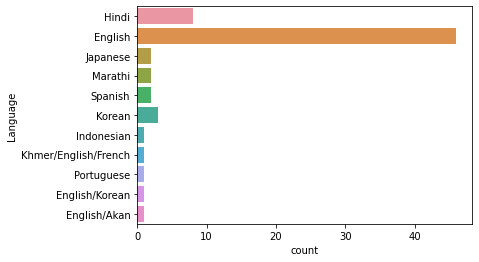

In [7]:
uzun_film=pd.DataFrame(df[df["Runtime"] > 120]["Language"], columns=["Language"])
sns.countplot(y=uzun_film["Language"], data=uzun_film)

Bar grafiğinde görüldüğü üzere en uzun soluklu filmlerin dili İngilizcedir.

### 2. 2019 Ocak ile 2020 Haziran tarihleri arasında 'Documentary' türünde çekilmiş filmlerin IMDB değerlerini bulup görselleştiriniz.

In [8]:
df_imdb=df[(df['Premiere'] > '2019-01-01') & (df["Premiere"] < '2020-06-01') & (df["Genre"]=="Documentary")]
[["Title","Genre","IMDB Score"]]

[['Title', 'Genre', 'IMDB Score']]

(array([ 1.,  0.,  0.,  3.,  0.,  1.,  8., 19., 15.,  2.]),
 array([2.5 , 3.08, 3.66, 4.24, 4.82, 5.4 , 5.98, 6.56, 7.14, 7.72, 8.3 ]),
 <BarContainer object of 10 artists>)

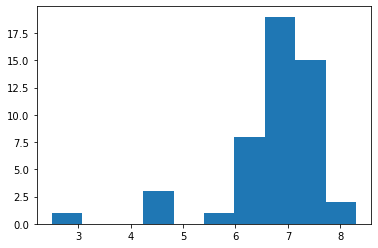

In [9]:
plt.hist(df_imdb["IMDB Score"])

Histogram grafiğinde yığılma yoğunluğunun 6 ile 8 arasında olduğunu söyleyebiliriz.

### 3.İngilizce çekilen filmler içerisinde hangi tür en yüksek IMDB puanına sahiptir?


In [10]:
df.loc[df["Language"]=="English"][["IMDB Score","Genre"]].max()


IMDB Score             9.0
Genre         Zombie/Heist
dtype: object

İngilizce çekilen filmler arasında en yüksek IMDB puanına sahip kategori Zombie/Heist'dır.

### 4.'Hindi' Dilinde çekilmiş olan filmlerin ortalama 'runtime' suresi nedir?

In [11]:
df.loc[df["Language"]=="Hindi"]["Runtime"].mean()

115.78787878787878

115.78 dakikadır.

### 5.'Genre' Sütunu kaç kategoriye sahiptir ve bu kategoriler nelerdir? Görselleştirerek ifade ediniz.

In [12]:
df_genre=df["Genre"].value_counts()
df_genre

Documentary                             159
Drama                                    77
Comedy                                   49
Romantic comedy                          39
Thriller                                 33
                                       ... 
Stop Motion                               1
Animation/Christmas/Comedy/Adventure      1
Comedy/Fantasy/Family                     1
Animation / Science Fiction               1
Horror comedy                             1
Name: Genre, Length: 115, dtype: int64

In [13]:
df["Genre"].nunique()

115

Genre sütunu 115 farklı kategoriye sahiptir.

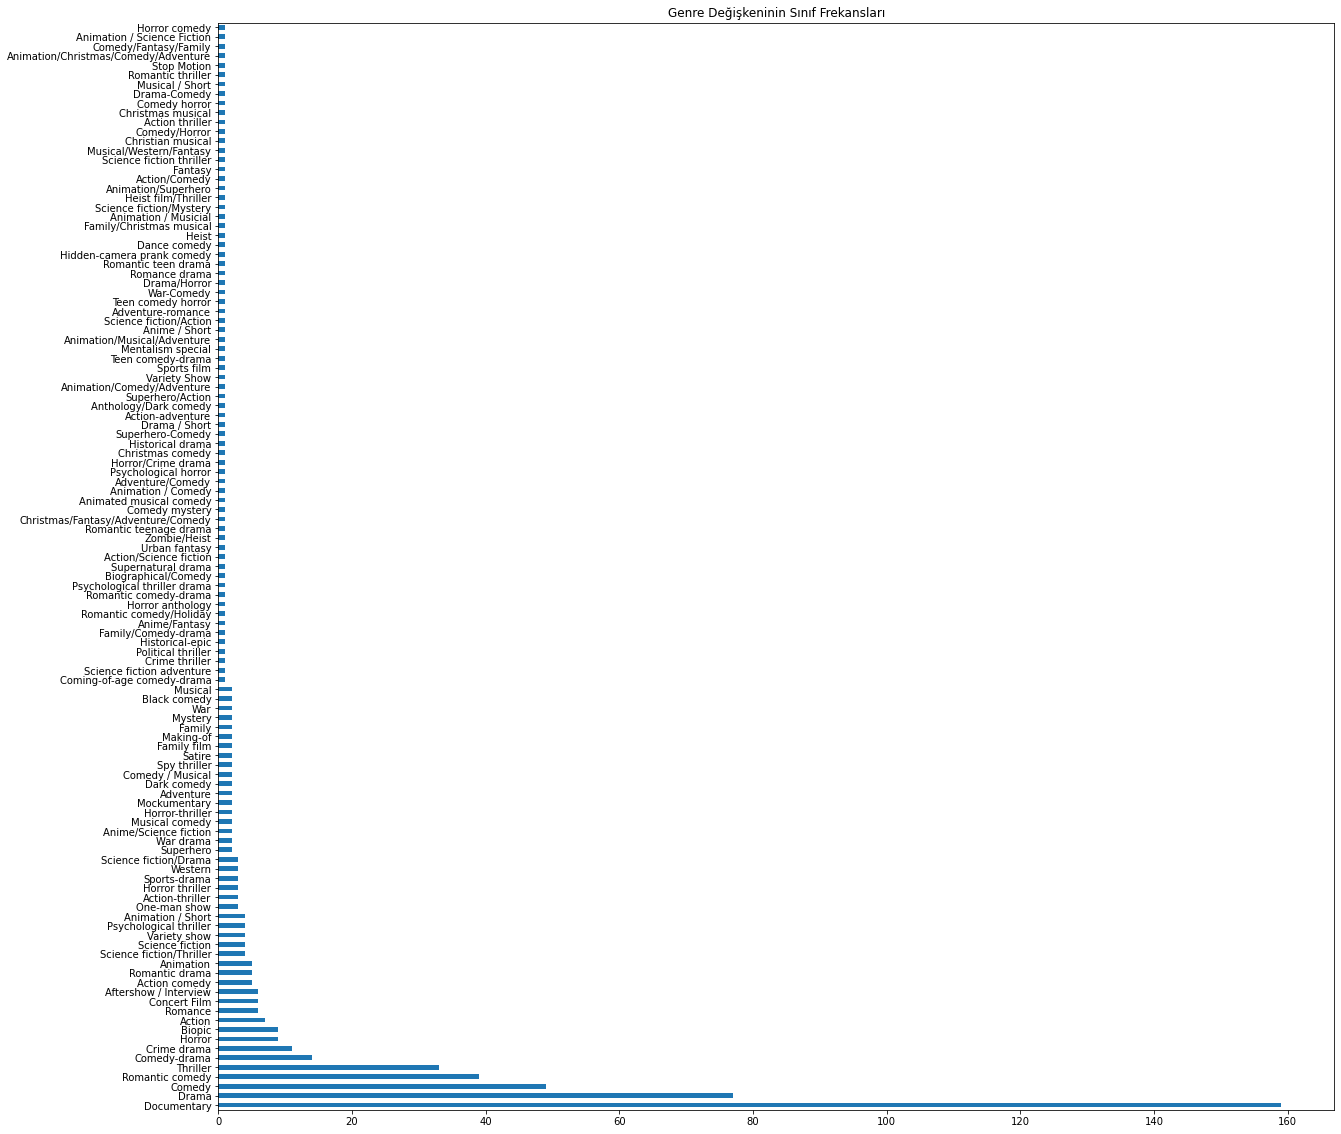

In [14]:
(df["Genre"]
 .value_counts()
 .plot.barh(figsize=(20,20))
 .set_title("Genre Değişkeninin Sınıf Frekansları")) ;


### 6.Veri setinde bulunan filmlerde en çok kullanılan 3 dili bulunuz.

In [15]:
df["Language"].value_counts().head(3)

English    401
Hindi       33
Spanish     31
Name: Language, dtype: int64

İngilizce, Hintçe ve İspanyolca.

### 7.IMDB puanı en yüksek olan ilk 10 film hangileridir?

In [16]:
top_10=df.nlargest(n=10, columns=("IMDB Score"))
top_10

,Title,Genre,Premiere,Runtime,IMDB Score,Language
583,David Attenborough: A Life on Our Planet,Documentary,2020-10-04,83,9.0,English
582,Emicida: AmarElo - It's All For Yesterday,Documentary,2020-12-08,89,8.6,Portuguese
581,Springsteen on Broadway,One-man show,2018-12-16,153,8.5,English
578,Ben Platt: Live from Radio City Music Hall,Concert Film,2020-05-20,85,8.4,English
579,Taylor Swift: Reputation Stadium Tour,Concert Film,2018-12-31,125,8.4,English
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,2015-10-09,91,8.4,English/Ukranian/Russian
576,Cuba and the Cameraman,Documentary,2017-11-24,114,8.3,English
577,Dancing with the Birds,Documentary,2019-10-23,51,8.3,English
571,13th,Documentary,2016-10-07,100,8.2,English
572,Disclosure: Trans Lives on Screen,Documentary,2020-06-19,107,8.2,English


### 8.IMDB puanı ile 'Runtime' arasında nasıl bir korelasyon vardır? İnceleyip görselleştiriniz.

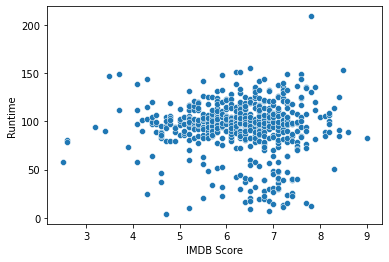

In [17]:
sns.scatterplot(x="IMDB Score", y="Runtime", data=df);

Korelasyon yoktur.

### 9.IMDB Puanı en yüksek olan ilk 10 'Genre' hangileridir? Görselleştiriniz.

In [18]:
top_10_g=df.groupby("Genre").agg({"IMDB Score": "max"}).sort_values(by="IMDB Score",ascending=False).head(10)
top_10_g


,IMDB Score
Genre,
Documentary,9.0
One-man show,8.5
Concert Film,8.4
Animation/Christmas/Comedy/Adventure,8.2
Drama,7.9
Animation / Short,7.8
Crime drama,7.8
Musical / Short,7.7
Making-of,7.7


In [19]:

top_10_g["Genre"] = top_10_g.index
top_10_g.drop("Genre", axis=1, inplace=True)

top_10_g.reset_index().head()
top_10_g = top_10_g.reset_index()
top_10_g

,Genre,IMDB Score
0,Documentary,9.0
1,One-man show,8.5
2,Concert Film,8.4
3,Animation/Christmas/Comedy/Adventure,8.2
4,Drama,7.9
5,Animation / Short,7.8
6,Crime drama,7.8
7,Musical / Short,7.7
8,Making-of,7.7
9,War drama,7.7


<AxesSubplot:xlabel='IMDB Score', ylabel='Genre'>

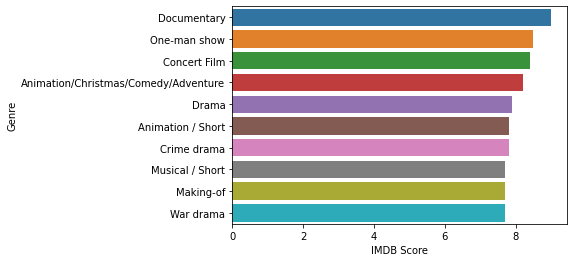

In [20]:
sns.barplot(x="IMDB Score",y= "Genre" ,data=top_10_g)

### 10.'Runtime' değeri en yüksek olan ilk 10 film hangileridir? Görselleştiriniz.

In [21]:
top_10_rt=df.nlargest(n=10, columns=("Runtime"))
top_10_rt

,Title,Genre,Premiere,Runtime,IMDB Score,Language
561,The Irishman,Crime drama,2019-11-27,209,7.8,English
328,Da 5 Bloods,War drama,2020-06-12,155,6.5,English
581,Springsteen on Broadway,One-man show,2018-12-16,153,8.5,English
247,Citation,Drama,2020-11-06,151,6.2,English
284,The Forest of Love,Drama,2019-10-11,151,6.3,Japanese
7,The Last Days of American Crime,Heist film/Thriller,2020-06-05,149,3.7,English
509,Raat Akeli Hai,Thriller,2020-07-31,149,7.3,Hindi
543,Ludo,Anthology/Dark comedy,2020-11-12,149,7.6,Hindi
194,Army of the Dead,Zombie/Heist,2021-05-21,148,5.9,English
5,Drive,Action,2019-11-01,147,3.5,Hindi


<AxesSubplot:xlabel='Runtime', ylabel='Title'>

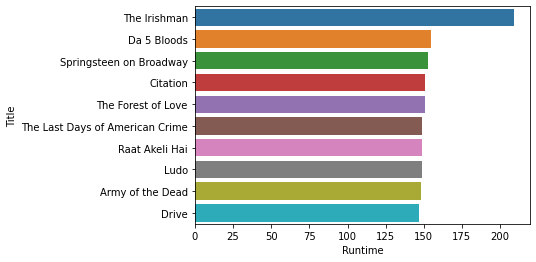

In [22]:
sns.barplot(x="Runtime", y="Title" ,data=top_10_rt)

### 11. Hangi yılda en fazla film yayımlanmıştır? Görselleştiriniz.


In [23]:
df['Premiere'].dt.year.value_counts()

2020    183
2019    125
2018     99
2021     71
2017     66
2016     30
2015      9
2014      1
Name: Premiere, dtype: int64

Text(0.5, 1.0, 'Premiere Değişkeninin Sınıf Frekansları')

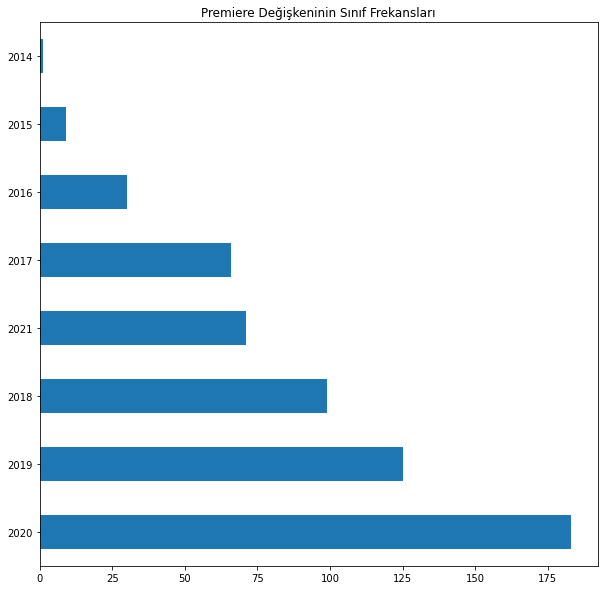

In [24]:
(df["Premiere"]
 .dt
 .year
 .value_counts()
 .plot.barh(figsize=(10,10))
 .set_title("Premiere Değişkeninin Sınıf Frekansları"))

### 12. Hangi dilde yayımlanan filmler en düşük ortalama IMBD puanına sahiptir? Görselleştiriniz.

In [25]:
lang_mean=df.groupby("Language")["IMDB Score"].mean()

lm = pd.DataFrame(lang_mean)

In [26]:
lm.reset_index(inplace=True)
lm

,Language,IMDB Score
0,Bengali,7.100000
1,Dutch,5.800000
2,English,6.380050
3,English/Akan,7.700000
4,English/Arabic,7.300000
5,English/Hindi,7.300000
6,English/Japanese,4.400000
7,English/Korean,7.300000
8,English/Mandarin,7.050000
9,English/Russian,7.300000


<AxesSubplot:xlabel='IMDB Score', ylabel='Language'>

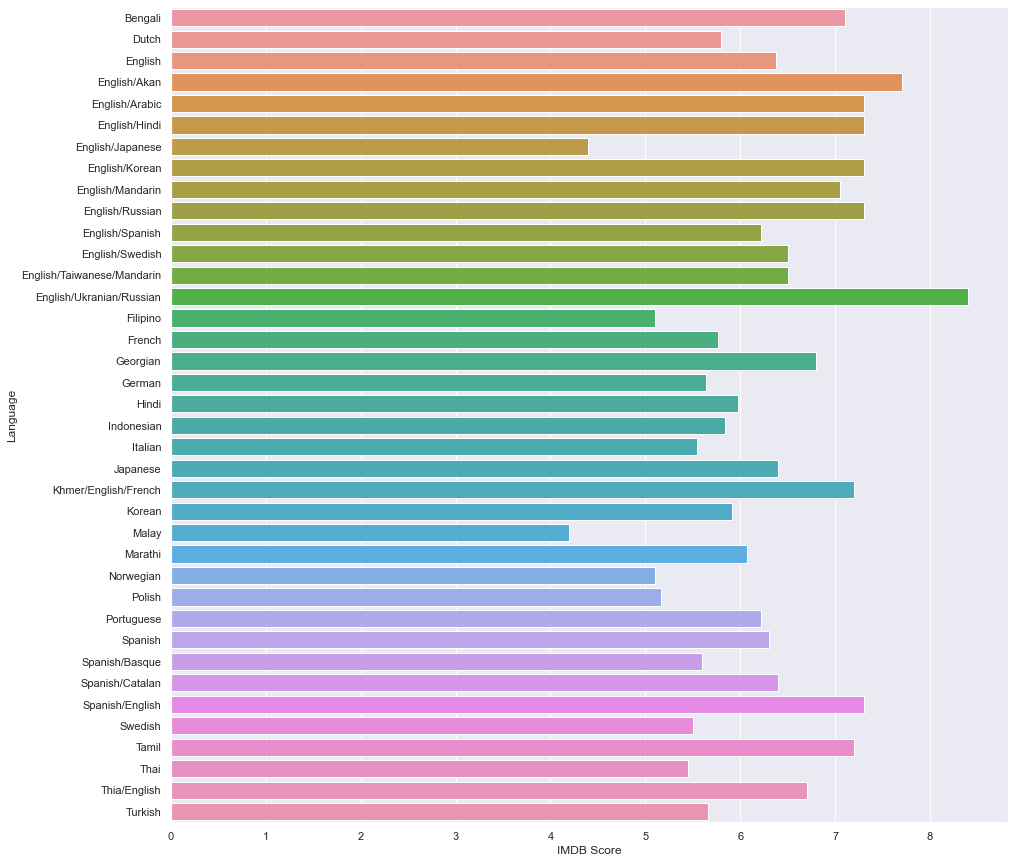

In [27]:
sns.set(rc = {'figure.figsize':(15,15)})
sns.barplot(x="IMDB Score", y="Language" , data=lm) #figsize büyütülecek


In [28]:
lm.sort_values("IMDB Score").head()

,Language,IMDB Score
24,Malay,4.200000
6,English/Japanese,4.400000
26,Norwegian,5.100000
14,Filipino,5.100000
27,Polish,5.166667


En düşük ortalama IMBD puanına sahip olan filmler malayca dilinde yayımlanmıştır.

### 13. Hangi yılın toplam "runtime" süresi en fazladır?

In [29]:
df_year_r = df.groupby(df['Premiere'].dt.year)["Runtime"].agg(['sum'])
df_year_r

,sum
Premiere,
2014,81
2015,814
2016,2766
2017,6129
2018,9405
2019,10856
2020,17384
2021,7214


En çok runtime'a sahip olan yıl 2020 yılıdır.

### 14. Her bir dilin en fazla kullanıldığı "Genre" nedir?

In [30]:
 df.groupby("Language").agg({"Genre":"max"})

,Genre
Language,
Bengali,Documentary
Dutch,Romantic comedy
English,Zombie/Heist
English/Akan,War drama
English/Arabic,Documentary
English/Hindi,Documentary
English/Japanese,Documentary
English/Korean,Action-adventure
English/Mandarin,Documentary


### 15. Veri setinde outlier veri var mıdır? Açıklayınız.

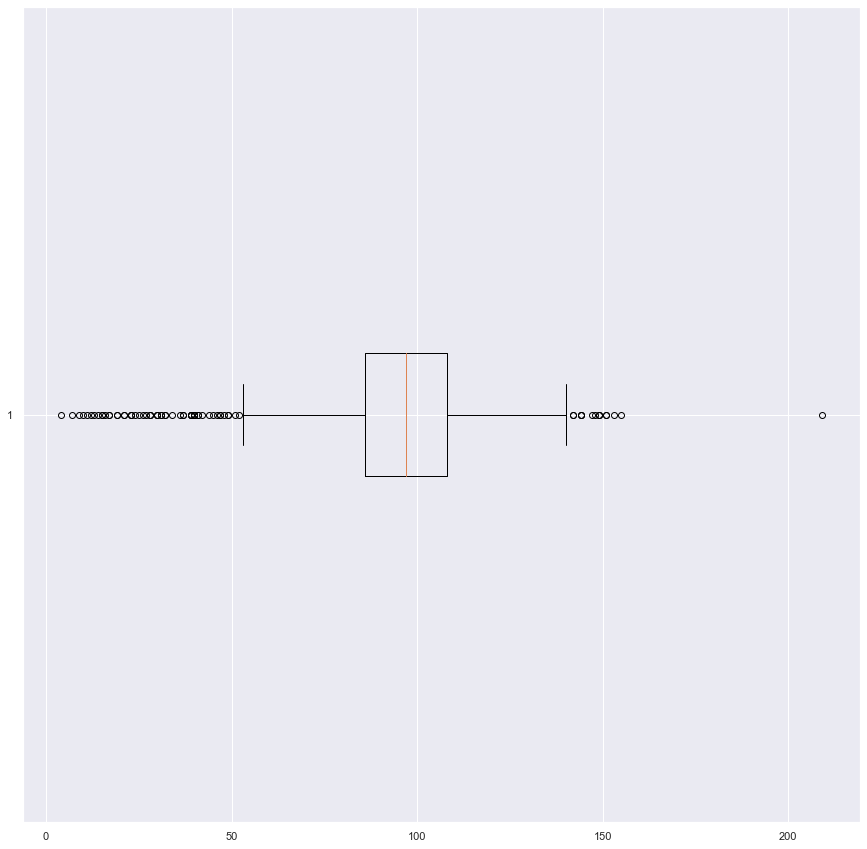

In [31]:
plt.boxplot(df["Runtime"],vert=0)
plt.show()

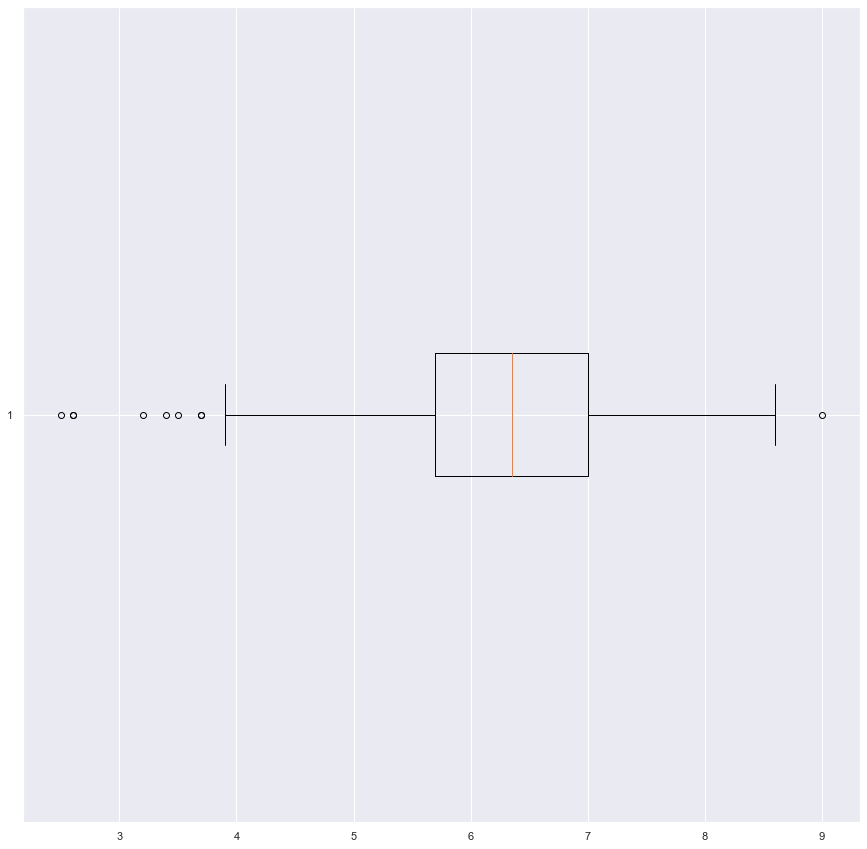

In [32]:
plt.boxplot(df["IMDB Score"],vert=0)
plt.show()

In [33]:
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1=dataframe[col_name].quantile(q1)
    quartile3=dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit= quartile3 + interquantile_range*1.5
    low_limit= quartile1 - interquantile_range*1.5
    return low_limit, up_limit

In [34]:
def check_outlier(dataframe, col_name):
    low_limit,up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [35]:
check_outlier(df,"IMDB Score")

True

In [36]:
check_outlier(df,"Runtime")

True